#The Data set for my Project are:

* Obesity Rates in the USA  
**File Name:** *OB_PREV_ALL_STATES*
    * Broken down by County
    * For the Years 2004 - 2012 inclusive.  
    

* Farmers Market Locations in the USA  
**File Name:** *Farmers_market_Dir*
    * Name, location (including County)
    * Current Results (Updated Dec 18 2015)  


* Food Security Factors in the USA  
**File Name:** *FoodSecAll*  
    * All data is for 2007 or 2012 or the change over the 5 year period. 
    * Several food secutiy factors including:  
        * Grocery Stores per 1000 ppl in county
        * Grocery Store access
        * Grocery Store %change from 07-12
        * Fast Food restaurants per 1000
        * Fast Food restaurants % change
        * Expenditures per capita, fast food, 2002 & 2007
        * Farmers' markets, 2009 & 2012
        * *Many* more
    * Most Results are for 2007, 2010, 2012 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns

In [2]:
#Ob_set is the Obesity set of date. It has the obesity rates from 2004 - 2012 per county
#Lets load in the data toutilize it further
#"number yyyy" is the percentage of obese idividuals based on the surverys done each year for the entire county
Ob_set = pd.read_excel("OB_PREV_ALL_STATES.xlsx", "obesity")

In [3]:
#Remove all the extra data in the Obesity list to leave just the numbers and % obese per county
for col in Ob_set.columns[4:]:
    if 'number' not in col and 'percent' not in col or 'age' in col:
        del Ob_set[col]

In [4]:
#Add a column to the Ob_set full of 0s to be counted up for each county in the FarmMkt list
#Ob_set['FarmersMkts Per County'] = pd.Series(0, index=Ob_set.index)

In [5]:
#FarmMkt is the set of farmers markets in the US
#Pull in the data to find the farmers market density per county
FarmMkt = pd.read_csv("Farmers_market_Dir.csv")

In [6]:
#Drop (remove) the columns in the farmers market data set that we dont need
#remove all coumns but 9 & 10
FarmMkt = FarmMkt.drop(FarmMkt.columns[1:8], axis=1)#,inplace=True)
FarmMkt = FarmMkt.drop(FarmMkt.columns[4:], axis=1)
FarmMkt = FarmMkt.dropna(subset=['County'], how='all') #drop all rows that have any NaN values

In [7]:
#remove all the rows with no County
#for row in range(1,len(FarmMkt.index)):
#    if 'Nan' == FarmMkt.ix[row,3]:
#        FarmMkt.drop(FarmMkt.index[[row]])
#INVALID with (dropna)

In [8]:
FarmMkt.head()

,FMID,city,County,State
0,1000618,Kalamazoo,Kalamazoo,Michigan
2,1010691,Lamar,Barton,Missouri
3,1002454,New York,New York,New York
4,1011100,Nashville,Davidson,Tennessee
5,1009845,New York,New York,New York


In [9]:
Ob_set.head()

,State,FIPS Codes,County,number 2004,percent 2004,number 2005,percent 2005,number 2006,percent 2006,number 2007,...,number 2008,percent 2008,number 2009,percent 2009,number 2010,percent 2010,number 2011,percent 2011,number 2012,percent 2012
0,Alabama,1001,Autauga,10180,30.2,10050,28.87,9912,27.9,10640,...,11350,31.5,12024,34.1,11761,30.5,12340,31.3,12184,30.9
1,Alabama,1003,Baldwin,30120,25.7,30710,25.11,30460,23.9,31240,...,33960,26.2,34244,25.5,36348,26.6,35005,25.0,38245,26.7
2,Alabama,1005,Barbour,6645,31.7,6972,33.04,7595,36.5,7591,...,8240,37.6,8264,37.0,7743,37.3,8021,38.4,8482,40.8
3,Alabama,1007,Bibb,4605,29.3,4910,30.79,4972,31.3,5062,...,5200,32.3,5460,34.0,5884,34.3,6423,37.3,6926,40.1
4,Alabama,1009,Blount,10330,25.5,11450,27.67,12080,28.9,13120,...,13530,31.9,13759,32.0,12690,30.4,13073,30.9,13789,32.4


In [35]:
#run through the Farm set and add 1 to each row of county to find the count
'''def CountyCount(Ob_set, FarmMkt):
    for row in range(1,len(FarmMkt.index)):
        for rowOB in range(1,len(Ob_set.index)):
            #If Farm county = Ob_set county and Farm state = Ob state then
            if FarmMkt.ix[row,3] == Ob_set.ix[rowB,2] and FarmMkt.ix[row,4] == Ob_set.ix[rowB,0]:
                Ob_set.ix[rowB,21] += 1
                break
'''
#no longer needed - using CSKey instead

'def CountyCount(Ob_set, FarmMkt):\n    for row in range(1,len(FarmMkt.index)):\n        for rowOB in range(1,len(Ob_set.index)):\n            #If Farm county = Ob_set county and Farm state = Ob state then\n            if FarmMkt.ix[row,3] == Ob_set.ix[rowB,2] and FarmMkt.ix[row,4] == Ob_set.ix[rowB,0]:\n                Ob_set.ix[rowB,21] += 1\n                break\n'

In [10]:
#make a new column in FarmMkt and Ob_set to be a key to match the county/state pair
Ob_set['CSKey'] = Ob_set[['County','State']].sum(axis=1)
FarmMkt['CSKey'] = FarmMkt[['County','State']].sum(axis=1)

In [11]:
#New frame for the group by for the farmers market data
NewFrame = FarmMkt.groupby('CSKey').count()
NewFrame = NewFrame.drop(NewFrame.columns[1:], axis=1)
NewFrame.columns = ['FarmersMkts Per County']
#then merge it with the OBesity set to have the Fearmers market counts
#Ob_set['FarmersMkts Per County'] = Ob_set.merge(NewFrame, on=NewFrame.index, how='left')
Ob_set = pd.merge(Ob_set, NewFrame, how='left', left_on='CSKey',left_index=False, right_index=True, sort=True, copy=True)
#then drop the Key from the Ob_set data as no longer needed
Ob_set = Ob_set.drop(Ob_set.columns[Ob_set.columns.get_loc('CSKey')], axis=1)

In [12]:
#Change all the Nan values in the Famers count to 0
Ob_set['FarmersMkts Per County'] = Ob_set['FarmersMkts Per County'].fillna(int(0))
#Change all the Farmers market vals to ints
Ob_set['FarmersMkts Per County'] = Ob_set['FarmersMkts Per County'].astype(int)

In [13]:
Ob_set.describe()

,FIPS Codes,number 2004,percent 2004,number 2005,percent 2005,number 2006,percent 2006,number 2007,percent 2007,number 2008,percent 2008,number 2009,percent 2009,number 2010,percent 2010,number 2011,percent 2011,number 2012,percent 2012,FarmersMkts Per County
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,30435.328553,15658.998783,25.279764,16362.079031,26.174576,17298.036606,27.458604,18033.087581,28.282664,18709.140293,28.930688,19584.671447,30.335277,19802.790950,30.553952,19981.115360,30.691077,20182.521351,30.947164,2.393563
std,15134.945712,45183.715792,3.245405,46406.136789,3.395485,48559.077368,3.568106,51115.995724,3.626874,53095.591310,3.711118,55764.681731,4.161112,55488.038307,4.242072,55752.326566,4.342126,55722.522787,4.467248,5.295325
min,1001.000000,10.220000,12.300000,12.000000,11.730000,13.030000,12.600000,11.840000,12.500000,10.430000,11.700000,11.000000,13.700000,22.000000,13.100000,22.000000,12.000000,20.000000,10.700000,0.000000
25%,19001.500000,2128.000000,23.900000,2218.750000,24.820000,2307.500000,26.000000,2346.750000,26.700000,2382.500000,27.200000,2508.000000,28.100000,2576.750000,28.300000,2621.250000,28.400000,2614.000000,28.500000,0.000000
50%,29182.000000,4810.500000,25.400000,5053.500000,26.250000,5345.000000,27.600000,5492.500000,28.500000,5656.000000,29.100000,5904.500000,30.500000,6043.000000,30.700000,6163.500000,30.900000,6218.500000,31.200000,1.000000
75%,45084.500000,11730.000000,26.900000,12385.000000,28.000000,13167.500000,29.400000,13737.500000,30.200000,14297.500000,31.000000,14988.000000,32.800000,15257.250000,33.100000,15549.500000,33.400000,15755.000000,33.700000,2.000000
max,56045.000000,1341000.000000,38.000000,1332000.000000,38.950000,1363000.000000,41.900000,1428000.000000,43.500000,1461000.000000,43.700000,1518890.000000,47.600000,1516570.000000,47.900000,1537980.000000,48.100000,1536910.000000,46.600000,120.000000


C:\Users\ahellman\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


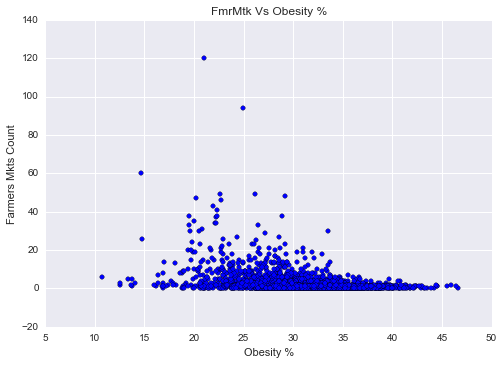

In [14]:
import matplotlib.pyplot as pltFMOb
pltFMOb.xlabel('Obesity %')
pltFMOb.ylabel('Farmers Mkts Count')
pltFMOb.title('FmrMtk Vs Obesity %')
pltFMOb.scatter(Ob_set['percent 2012'], Ob_set['FarmersMkts Per County'], label="training points")

In [15]:
#take all the X values (in this case the obesity percent) and take them to the every power up to the 7th
#so that we can use these values in our plotting
Obper = (Ob_set['percent 2012'])
XObper = np.column_stack((Obper, 
                          np.power(Obper, 2), 
                          np.power(Obper, 3),
                          np.power(Obper, 4),
                          np.power(Obper, 5),
                          np.power(Obper, 6),
                          np.power(Obper, 7)))

# xvals is a vector of length 100 spanning from 5 and 50
# We use this as the x-values for a grid
# We will find y values to plot against these to sketch out the 7th deg function.
xvals = np.linspace(5,50,100)

# X_vals is the design matrix with all the 100 grid values
# With added columns of those grid values raised to the 2nd, 3rd, .. 7th power.
X_vals = np.column_stack((xvals, 
                     np.power(xvals, 2), 
                     np.power(xvals, 3),
                     np.power(xvals, 4),
                     np.power(xvals, 5),
                     np.power(xvals, 6),
                     np.power(xvals, 7)))

ys = np.vstack(Ob_set['FarmersMkts Per County'].tolist())

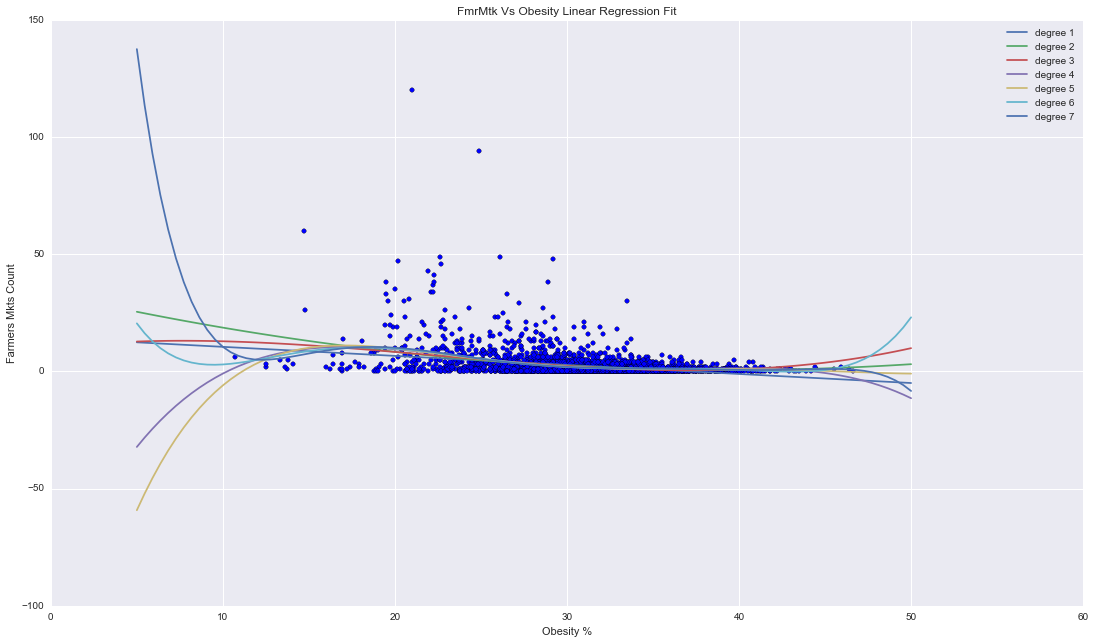

In [16]:
#Linear Regression of the Farmers Market Denisty per County and Obesity Rate. Per County
pltFMOb.scatter(Ob_set['percent 2012'], Ob_set['FarmersMkts Per County'])
LRscore = []

for degree in [1,2,3,4,5,6,7]:
    lmFMOB = LinearRegression()
    lmFMOB.fit(XObper[:,:degree], ys)
    pred = lmFMOB.predict(X_vals[:,:degree])
    pltFMOb.plot(np.array(xvals), pred, label="degree %d" % degree)
    LRscore.append(lmFMOB.score(XObper[:,:degree], ys))

pltFMOb.xlabel('Obesity %')
pltFMOb.ylabel('Farmers Mkts Count')
pltFMOb.title('FmrMtk Vs Obesity Linear Regression Fit')
pltFMOb.legend(loc='upper right')
#Save the file as an image
fig = pltFMOb.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('FrmMkt_Vs_ObPer_LR.png', dpi=300)

In [17]:
print lmFMOB.intercept_
print lmFMOB.coef_
print LRscore

[ 783.69940823]
[[ -2.31627082e+02   2.78203777e+01  -1.75305086e+00   6.30981881e-02
   -1.30815714e-03   1.45621340e-05  -6.74920856e-08]]
[0.10600412271158455, 0.12509365362261404, 0.12847462177258184, 0.13910968034817917, 0.14001867548716207, 0.14176995710180251, 0.14274707651026963]


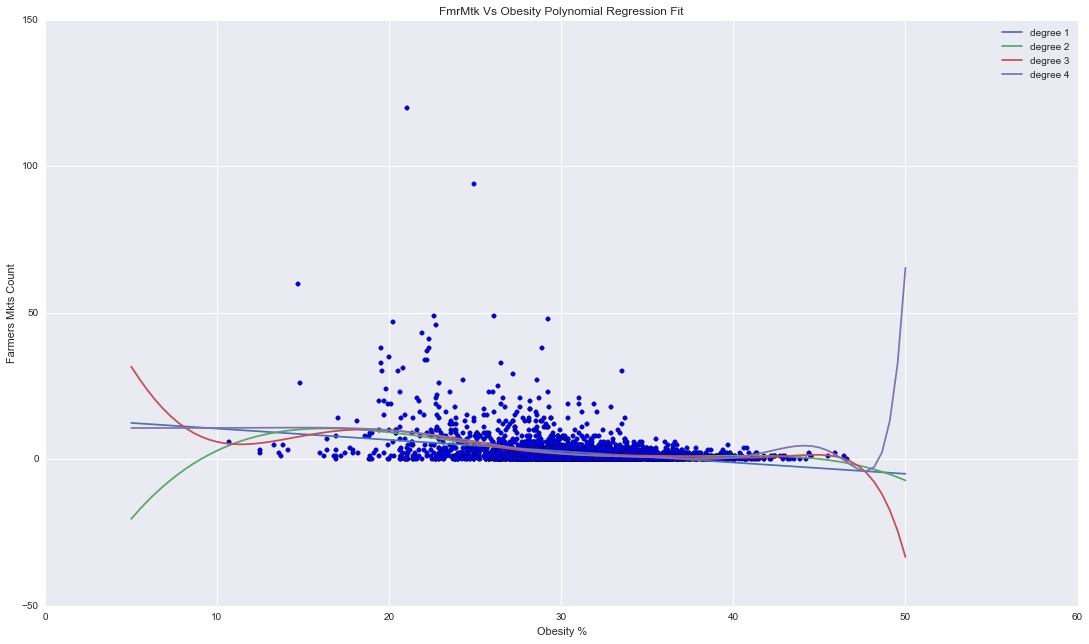

In [19]:
#polynotmail Regression Fitting
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pltFMOb.scatter(Ob_set['percent 2012'], Ob_set['FarmersMkts Per County'])
PRscore = []

for degree in [1,2,3,4]:
    pmFMOB = make_pipeline(PolynomialFeatures(degree), Ridge())
    pmFMOB.fit(XObper[:,:degree], ys)
    pred = pmFMOB.predict(X_vals[:,:degree])
    pltFMOb.plot(xvals, pred, label="degree %d" % degree)
    PRscore.append(pmFMOB.score(XObper[:,:degree], ys))
    
pltFMOb.xlabel('Obesity %')
pltFMOb.ylabel('Farmers Mkts Count')
pltFMOb.title('FmrMtk Vs Obesity Polynomial Regression Fit')
pltFMOb.legend(loc='upper right')
#Save the file as an image
fig = pltFMOb.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('FrmMkt_Vs_ObPer_PR.png', dpi=300)

In [20]:
print PRscore

[0.10600412268453729, 0.13850319902920927, 0.14288862711952732, 0.13268373247497089]


In [21]:
Ob_set.describe()

,FIPS Codes,number 2004,percent 2004,number 2005,percent 2005,number 2006,percent 2006,number 2007,percent 2007,number 2008,percent 2008,number 2009,percent 2009,number 2010,percent 2010,number 2011,percent 2011,number 2012,percent 2012,FarmersMkts Per County
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,30435.328553,15658.998783,25.279764,16362.079031,26.174576,17298.036606,27.458604,18033.087581,28.282664,18709.140293,28.930688,19584.671447,30.335277,19802.790950,30.553952,19981.115360,30.691077,20182.521351,30.947164,2.393563
std,15134.945712,45183.715792,3.245405,46406.136789,3.395485,48559.077368,3.568106,51115.995724,3.626874,53095.591310,3.711118,55764.681731,4.161112,55488.038307,4.242072,55752.326566,4.342126,55722.522787,4.467248,5.295325
min,1001.000000,10.220000,12.300000,12.000000,11.730000,13.030000,12.600000,11.840000,12.500000,10.430000,11.700000,11.000000,13.700000,22.000000,13.100000,22.000000,12.000000,20.000000,10.700000,0.000000
25%,19001.500000,2128.000000,23.900000,2218.750000,24.820000,2307.500000,26.000000,2346.750000,26.700000,2382.500000,27.200000,2508.000000,28.100000,2576.750000,28.300000,2621.250000,28.400000,2614.000000,28.500000,0.000000
50%,29182.000000,4810.500000,25.400000,5053.500000,26.250000,5345.000000,27.600000,5492.500000,28.500000,5656.000000,29.100000,5904.500000,30.500000,6043.000000,30.700000,6163.500000,30.900000,6218.500000,31.200000,1.000000
75%,45084.500000,11730.000000,26.900000,12385.000000,28.000000,13167.500000,29.400000,13737.500000,30.200000,14297.500000,31.000000,14988.000000,32.800000,15257.250000,33.100000,15549.500000,33.400000,15755.000000,33.700000,2.000000
max,56045.000000,1341000.000000,38.000000,1332000.000000,38.950000,1363000.000000,41.900000,1428000.000000,43.500000,1461000.000000,43.700000,1518890.000000,47.600000,1516570.000000,47.900000,1537980.000000,48.100000,1536910.000000,46.600000,120.000000


In [22]:
#GrocStore is the set of food stores in the US
#Pull in the data to find the grocery and supercenters
FoodSecStore = pd.read_excel("FoodSecAllup.xls", 'STORES')
FoodSecRest = pd.read_excel("FoodSecAllup.xls", 'RESTAURANTS')

In [ ]:
#FoodSecRest Column Headers and units
'''Fast-food	Fast-food restaurants, 2007	FFR07	CNTY10	Count
Fast-food	Fast-food restaurants, 2012	FFR12	CNTY10	Count
Fast-food	Fast-food restaurants (% change), 2007-12	PCH_FFR_07_12	CNTY10	% change 
Fast-food	Fast-food restaurants/1,000 pop, 2007	FFRPTH07	CNTY10	# per 1,000 pop
Fast-food	Fast-food restaurants/1,000 pop, 2012	FFRPTH12	CNTY10	# per 1,000 pop
Fast-food	Fast-food restaurants/1,000 pop (% change), 2007-12	PCH_FFRPTH_07_12	CNTY10	% change 
Full-service	Full-service restaurants, 2007	FSR07	CNTY10	Count
Full-service	Full-service restaurants, 2012	FSR12	CNTY10	Count
Full-service	Full-service restaurants (% change), 2007-12	PCH_FSR_07_12	CNTY10	% change 
Full-service	Full-service restaurants/1,000 pop, 2007	FSRPTH07	CNTY10	Count
Full-service	Full-service restaurants/1,000 pop, 2012	FSRPTH12	CNTY10	Count
Full-service	Full-service restaurants/1,000 pop (% change), 2007-12	PCH_FSRPTH_07_12	CNTY10	% change 
Expenditures	Expenditures per capita, fast food, 2002*	PC_FFRSALES02	CNTY10	Dollars
Expenditures	Expenditures per capita, fast food, 2007*	PC_FFRSALES07	CNTY10	Dollars
Expenditures	Expenditures per capita, restaurants, 2002*	PC_FSRSALES02	CNTY10	Dollars
Expenditures	Expenditures per capita, restaurants, 2007*	PC_FSRSALES07	CNTY10	Dollars
'''

In [21]:
FoodSecRest.describe()

,FIPS,FFR07,FFR12,PCH_FFR_07_12,FFRPTH07,FFRPTH12,PCH_FFRPTH_07_12,FSR07,FSR12,PCH_FSR_07_12,FSRPTH07,FSRPTH12,PCH_FSRPTH_07_12,PC_FFRSALES02,PC_FFRSALES07,PC_FSRSALES02,PC_FSRSALES07
count,3143.000000,3138.000000,3143.000000,3100.000000,3138.000000,3143.000000,3143.000000,3138.000000,3143.000000,3115.000000,3138.000000,3143.000000,3143.000000,3127.000000,3143.000000,3127.000000,3143.000000
mean,30390.411709,67.252390,71.548521,3.781976,0.591964,0.578446,1.177294,69.935628,73.722876,5.043559,0.805607,0.791385,2.408114,472.145187,641.617910,464.006396,624.523725
std,15164.717720,228.582726,249.192347,35.941366,0.317609,0.304495,35.085306,230.151750,243.985381,34.728092,0.589976,0.592854,34.118073,56.993445,96.641980,83.102312,128.070842
min,1001.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,321.000000,402.097804,261.000000,371.845051
25%,18178.000000,5.000000,5.000000,-10.000000,0.426742,0.414440,-12.469848,7.000000,7.000000,-10.526316,0.508626,0.501091,-12.594520,433.000000,576.210444,410.000000,534.383583
50%,29177.000000,15.000000,15.000000,0.000000,0.592526,0.583453,-0.200351,17.000000,17.000000,0.000000,0.686083,0.682144,0.000000,482.000000,632.337378,460.000000,617.339007
75%,45082.000000,42.000000,44.000000,14.285714,0.741375,0.731927,9.882011,47.000000,49.000000,15.384615,0.934171,0.911513,11.502663,520.000000,721.823151,513.000000,711.769798
max,56045.000000,7175.000000,7641.000000,400.000000,6.968641,5.797101,400.256454,7008.000000,7204.000000,300.000000,13.937282,13.043478,339.011427,708.000000,1043.860861,965.000000,1930.155806


In [51]:
FarmMkt.head()

,FMID,city,County,State,CSKey
0,1000618,Kalamazoo,Kalamazoo,Michigan,KalamazooMichigan
2,1010691,Lamar,Barton,Missouri,BartonMissouri
3,1002454,New York,New York,New York,New YorkNew York
4,1011100,Nashville,Davidson,Tennessee,DavidsonTennessee
5,1009845,New York,New York,New York,New YorkNew York


In [64]:
FarmMktAll = pd.read_csv("Farmers_market_Dir.csv")
FarmMktAll.columns[[7,8,11,13,15,17,19,21,26,29,30]]
#FarmMktAll.columns[1:4]

#make a new Farmers Market set for the food types they sell to apply to the data to see if that influences anything
FarmMktFood = pd.read_csv("Farmers_market_Dir.csv")
#Drop (remove) the columns in the farmers market data set that we dont need
#remove columns except the ones that we want to evalluate
FarmMktFood = FarmMktFood.drop(FarmMktFood.columns[1:8], axis=1)
FarmMktFood = FarmMktFood.drop(FarmMktFood.columns[4:21], axis=1)
FarmMktFood = FarmMktFood.drop(FarmMktFood.columns[[4,7,8,11,13,14,15,17,18,19,21,22,23,24,25,26,29,30,31,32,33,34]], axis=1)
FarmMktFood = FarmMktFood.dropna(subset=['County'], how='all') #drop all rows that have any NaN values

FarmMktFood['CSKey'] = FarmMktFood[['County','State']].sum(axis=1) #create the CSKey column
cols = FarmMktFood.columns.tolist() #move the CSKey to the front column
cols = cols[-1:] + cols[:-1] #move the CSKey to the front column
FarmMktFood = FarmMktFood[cols] #move the CSKey to the front column
FarmMktFood = FarmMktFood.dropna(subset=['Bakedgoods'], how='all') #drop all rows that have any NaN values

In [65]:
#replace all the Ys and Ns with 1 and 0
FarmMktFood.ix[:,'Bakedgoods':] = FarmMktFood.ix[:,'Bakedgoods':].replace("Y", 1)
FarmMktFood.ix[:,'Bakedgoods':] = FarmMktFood.ix[:,'Bakedgoods':].replace("N", 0)
FarmMktFood.head()

,CSKey,FMID,city,County,State,Bakedgoods,Cheese,Eggs,Seafood,Vegetables,Meat,Poultry,Fruits,Grains
0,KalamazooMichigan,1000618,Kalamazoo,Kalamazoo,Michigan,1,1,1,0,1,1,1,1,0
2,BartonMissouri,1010691,Lamar,Barton,Missouri,1,0,1,0,1,1,1,1,0
3,New YorkNew York,1002454,New York,New York,New York,1,0,0,0,1,0,0,0,0
4,DavidsonTennessee,1011100,Nashville,Davidson,Tennessee,1,1,1,0,1,1,1,1,0
5,New YorkNew York,1009845,New York,New York,New York,1,1,1,0,1,1,1,1,0


In [73]:
#Add up all the values in the Baked good on as a new column and have this as a Fresh Food Count
clist = list(FarmMktFood) #list column headers 
clist.remove('FMID') #remove the FMID so we dont add it in
FarmMktFood['FFscore'] = FarmMktFood[clist].sum(axis=1)
FarmMktFood.head()

,CSKey,FMID,city,County,State,Bakedgoods,Cheese,Eggs,Seafood,Vegetables,Meat,Poultry,Fruits,Grains,FFscore
0,KalamazooMichigan,1000618,Kalamazoo,Kalamazoo,Michigan,1,1,1,0,1,1,1,1,0,7
2,BartonMissouri,1010691,Lamar,Barton,Missouri,1,0,1,0,1,1,1,1,0,6
3,New YorkNew York,1002454,New York,New York,New York,1,0,0,0,1,0,0,0,0,2
4,DavidsonTennessee,1011100,Nashville,Davidson,Tennessee,1,1,1,0,1,1,1,1,0,7
5,New YorkNew York,1009845,New York,New York,New York,1,1,1,0,1,1,1,1,0,7


In [85]:
#New frame2 for the group by for the farmers market data
NewFrame2 = FarmMktFood.groupby('CSKey','FFscore').count()
#NewFrame2 = NewFrame2.drop(NewFrame2.columns[1:], axis=1)
#NewFrame2.columns = ['FarmersMkts Per County']

#NewFrame2.columns = ['CSKey']
NewFrame2.head()

ValueError: No axis named FFscore for object type <class 'pandas.core.frame.DataFrame'>

In [83]:
DataFrame2({'count' : FarmMktFood.groupby( [ "CSKey", "FFscore"] ).size()}).reset_index()

NameError: name 'DataFrame2' is not defined

In [80]:
#NewFrame2['FreshSum'] = FarmMktFood.apply(lambda x: x['FFscore'] if x['CSKey'], axis=1)
#df.FreshSum.sum()

NewFrame2 = FarmMktFood[(FarmMktFood.CSKey == NewFrame2.CSKey)]
NewFrame2.sum()

ValueError: Series lengths must match to compare

In [ ]:
#then merge it with the OBesity set to have the Fearmers market counts
#Ob_set['FarmersMkts Per County'] = Ob_set.merge(NewFrame, on=NewFrame.index, how='left')
Ob_set = pd.merge(Ob_set, NewFrame2, how='left', left_on='CSKey',left_index=False, right_index=True, sort=True, copy=True)
#then drop the Key from the Ob_set data as no longer needed
Ob_set = Ob_set.drop(Ob_set.columns[Ob_set.columns.get_loc('CSKey')], axis=1)